### Kissa Zahra, i21-0572,  Section: C
## All imports for this assignment

In [1]:
!pip install pymc

In [3]:
import pymc as pm
import pandas as pd
import arviz as az
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
print(pm.__version__)
print(pd.__version__)
print(az.__version__)
print(sp.__version__)

5.20.0
2.2.2
0.20.0
1.13.1


In [8]:
file_path = "/content/iris_filtered.csv"
if os.path.exists(file_path):
    print("File found!")
else:
    print("File is not here :(")


File found!


***Consider the IRIS dataset filtered and prepared***

---

he Iris dataset has been preprocessed by removing the Virginica class. Now, the species column consists of binary data, where Setosa is represented as 0 and Versicolor as 1. Your task is to extract the last column as a NumPy array and use PyMC to infer the bias parameter from this binary data. You must perform the task step by step as mentioned in the assignment

In [9]:
df=pd.read_csv('iris_filtered.csv')
print(df)

    sepal_length  sepal_width  petal_length  petal_width  species
0            7.0          3.2           4.7          1.4        0
1            6.4          3.2           4.5          1.5        0
2            6.9          3.1           4.9          1.5        0
3            5.5          2.3           4.0          1.3        0
4            6.5          2.8           4.6          1.5        0
..           ...          ...           ...          ...      ...
95           6.7          3.0           5.2          2.3        1
96           6.3          2.5           5.0          1.9        1
97           6.5          3.0           5.2          2.0        1
98           6.2          3.4           5.4          2.3        1
99           5.9          3.0           5.1          1.8        1

[100 rows x 5 columns]


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None


**Note: Orignal dataset is preprocessed for PyMC**

## 1. Read the last column from the dataframe

In [11]:
species = df['species']
print(species)

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64


## 2. convert the above to a numpy array

In [14]:
data=species.to_numpy()
print(data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(100,)


## 2. Pymc Model  ?

In [21]:
with pm.Model() as model:
  #Prior, before seeing the data i am assumming its fair
  p = pm.Beta("p", alpha=1, beta=1)

  #Likelyyhood: Bernoulli distribution with the bias parameter
  likelihood = pm.Bernoulli("likelihood", p=p, observed=data)


Output()

Output()

In [33]:
with model:
  #Inference
  trace = pm.sample(2000, return_inferencedata=True)

Output()

Output()

In [34]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

## 2. Summarizing posterior

array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

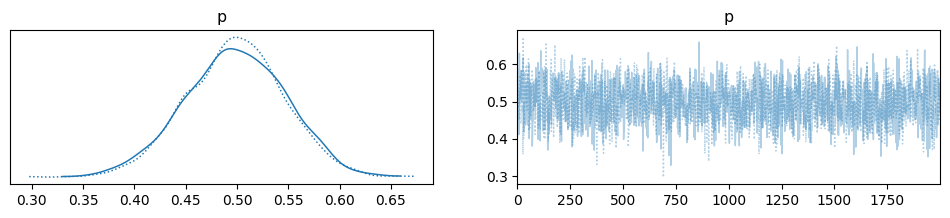

In [35]:
az.plot_trace(trace)

## 2. Summary

In [36]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.498,0.049,0.41,0.59,0.001,0.001,1975.0,2868.0,1.0


## Decision over the posterior

<Axes: title={'center': 'p'}>

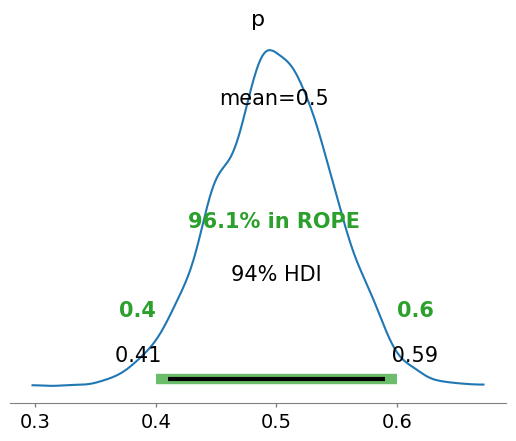

In [37]:
pm.plot_posterior(trace, rope=[0.40,0.60])

### your comment on this based on the ROPE and HDI comparison, ( See Book chapter 2 for more)

-----

-----

**Answer:** Since 96.1% of the posterior falls within ROPE [0.4, 0.6], and the 94% HDI [0.41, 0.59] is also inside, there’s no strong evidence of bias. The mean p = 0.498 is very close to 0.5, so it's likely fair.


### Generate the next 100 samples based on the learned parameter of the PyMC model ***(Prediction step***)

In [38]:
pm.sample_posterior_predictive(trace,model=model,extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='likelihood'>

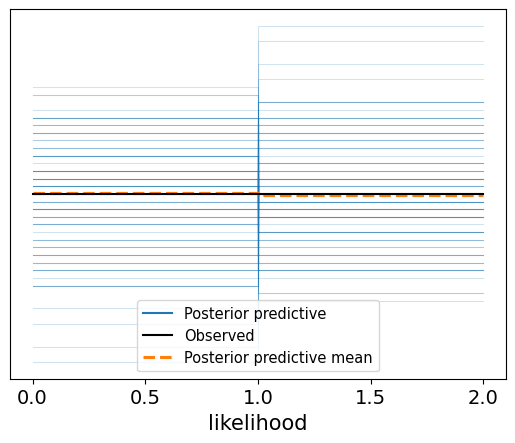

In [41]:
az.plot_ppc(trace,num_pp_samples=100)

### your one line openion on the above prediction based on the learned parameter of the model ?


---
---

**Answer:** Since the posterior predictive mean closely follows the observed data, the model has effectively captured the distribution of the binary outcomes (Setosa (0) vs. Versicolor(1)). That means the model has learned the pattern correctly and is making reliable predictions :)







